In [3]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd

(3000, 3) (3000,)


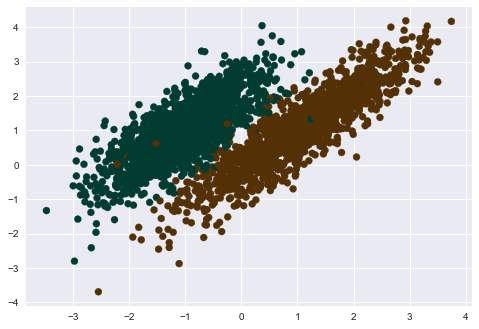

(3000, 4)


In [46]:
x=pd.read_csv('Datasets/seperate_chemicals/TrainingData/Logistic_X_Train.csv').values
y=pd.read_csv('Datasets/seperate_chemicals/TrainingData/Logistic_Y_Train.csv').values
y=y.reshape((-1,))
print(x.shape,y.shape)

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.BrBG)  #with custom color map
plt.show()

x=np.hstack((np.ones((x.shape[0],1)),x))
print(x.shape)

In [58]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypothesis(x,theta):
    return sigmoid(x.dot(theta))
def error(x,y,theta):
    y_=hypothesis(x,theta)
    return -1*np.mean(y*np.log(y_)+(1-y)*np.log(1-y_)) #Log Loss or Binary Cross Entropy Loss
def gradient(x,y,theta):
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y-y_)) # you can't write y_-y because from derivation we got y-y_ and 
    return grad/x.shape[0] # not y_-y
def gradientdescent(x,y,learning_rate=0.1,max_steps=50):
    theta=np.ones((x.shape[1],))
    error_=[]
    for i in range(max_steps):
        grad=gradient(x,y,theta)
        theta=theta+learning_rate*grad
        error_.append(error(x,y,theta))
    return error_,theta
def predict(x,theta):
    l=list(hypothesis(x,theta))
    y_=[]
    for i in l:
        if i>0.5:
            y_.append(1)
        else:
            y_.append(0)
    y_=np.array(y_)
    return y_
def accuracy(y,y_):
    return  float((y_==y).sum())*100/y.shape[0]
    

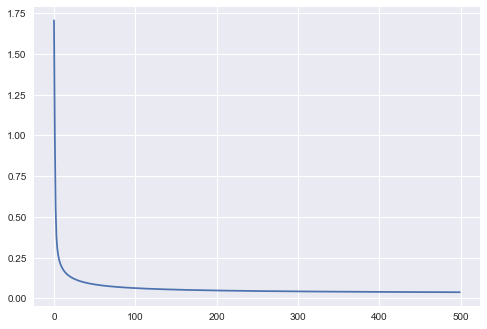

In [59]:
error_,theta=gradientdescent(x,y,learning_rate=0.6,max_steps=500)
plt.plot(error_)
plt.show()

99.46666666666667


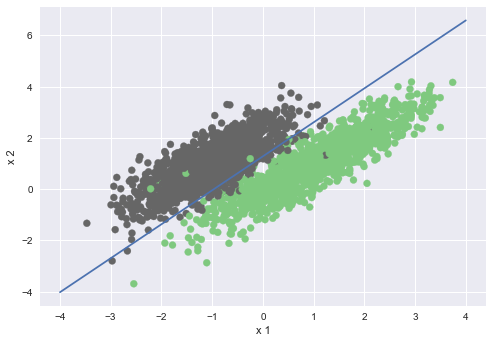

In [86]:
y_=predict(x,theta)
print(accuracy(y,y_))
plt.scatter(x[:,1],x[:,2],c=y,cmap=plt.cm.Accent)  #with custom color map
plt.xlabel('x 1')
plt.ylabel('x 2')
xx=np.linspace(-4,4,10)
plt.plot(xx,-1*(theta[1]*xx+theta[0])/theta[2]) #using x2*o2+x1*o1+o0=0 so x2=-(o0+o1*x1)/o2
plt.show()

In [64]:
xtest=pd.read_csv('Datasets/seperate_chemicals/TestCases/Logistic_X_Test.csv').values
xtest=np.hstack((np.ones((xtest.shape[0],1)),xtest))
y_=predict(xtest,theta)
df=pd.DataFrame(y_)

In [65]:
df.to_csv('seperate_chem_challenge_sol.csv',index=False,header=['label'])